# How to present this notebook
- This analysis powers the disease prediction model and the Streamlit app.
- For a guided explanation of each block (code → output → interpretation), open `docs/presentation_notes.md`.
- In the talk:
  1) Data overview →
  2) Symptom patterns (clustermap) →
  3) Weather vs disease (boxplots + ANOVA/Kruskal) →
  4) Symptom–disease association (Chi-square + Cramer's V) →
  5) Preprocessing & feature engineering →
  6) Baselines → tuning → interpretation (SHAP) → persistence & app.
- Key metric to emphasize: macro F1 due to class imbalance.
- Always state the null hypotheses for tests and interpret very small p-values as strong evidence against H0.

In [26]:
# notebooks/01_eda.ipynb - Cell 1
import pandas as pd, numpy as np
pd.set_option('display.max_columns', 200)

df = pd.read_csv('../data/Weather-related disease prediction.csv')   # adjust path
print(df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').transpose())


(5200, 51)


,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,fatigue,runny_nose,pain_behind_the_eyes,dizziness,headache,chest_pain,vomiting,cough,shivering,asthma_history,high_cholesterol,diabetes,obesity,hiv_aids,nasal_polyps,asthma,high_blood_pressure,severe_headache,weakness,trouble_seeing,fever,body_aches,sore_throat,sneezing,diarrhea,rapid_breathing,rapid_heart_rate,pain_behind_eyes,swollen_glands,rashes,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,Sinusitis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14  headache                

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5200.0,NaN,NaN,NaN,51.383269,26.625863,1.0,30.0,53.0,74.0,100.0
Gender,5200.0,NaN,NaN,NaN,0.511731,0.49991,0.0,0.0,1.0,1.0,1.0
Temperature (C),5200.0,NaN,NaN,NaN,19.943117,11.414905,-15.125,12.1845,20.0175,28.46525,40.996
Humidity,5200.0,NaN,NaN,NaN,0.744873,0.14286,0.370833,0.624479,0.75,0.86,1.0
Wind Speed (km/h),5200.0,NaN,NaN,NaN,10.708818,5.686331,0.008,6.414508,10.1525,15.06155,31.303096
nausea,5200.0,NaN,NaN,NaN,0.155385,0.362306,0.0,0.0,0.0,0.0,1.0
joint_pain,5200.0,NaN,NaN,NaN,0.065769,0.247902,0.0,0.0,0.0,0.0,1.0
abdominal_pain,5200.0,NaN,NaN,NaN,0.04,0.195978,0.0,0.0,0.0,0.0,1.0
high_fever,5200.0,NaN,NaN,NaN,0.101731,0.302323,0.0,0.0,0.0,0.0,1.0
chills,5200.0,NaN,NaN,NaN,0.062885,0.242779,0.0,0.0,0.0,0.0,1.0


In [27]:
# Cell 2 - downcast ints/floats
def downcast_df(df):
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='unsigned')
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    return df

df = downcast_df(df)
df.memory_usage(deep=True).sum()/1024**2


0.5801715850830078

In [28]:
# Missing counts
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing>0]
missing.to_frame('missing_count').to_csv('../outputs/tables/missing.csv')
display(missing.head(40))

# Unique counts
nunique = df.nunique().sort_values()
display(nunique.head(40))

Series([], dtype: int64)

obesity                    1
diabetes                   1
high_cholesterol           1
asthma_history             1
shivering                  1
severe_headache            2
weakness                   2
trouble_seeing             2
fever                      2
body_aches                 2
sore_throat                2
sneezing                   2
diarrhea                   2
rapid_breathing            2
rapid_heart_rate           2
pain_behind_eyes           2
swollen_glands             2
rashes                     2
sinus_headache             2
facial_pain                2
shortness_of_breath        2
reduced_smell_and_taste    2
high_blood_pressure        2
knee_ache                  2
asthma                     2
hiv_aids                   2
Gender                     2
back_pain                  2
confusion                  2
throbbing_headache         2
nausea                     2
joint_pain                 2
abdominal_pain             2
high_fever                 2
nasal_polyps  

In [29]:
from sklearn.impute import SimpleImputer

# Separate column groups
symptom_cols = [c for c in df.columns if df[c].dropna().nunique() <= 2 and c != "Gender" and c != "prognosis"]
numeric_cols = df.select_dtypes(include=['int16','int32','int64','float16','float32','float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['prognosis']]  # remove target

categorical_cols = [c for c in df.columns if c not in symptom_cols + numeric_cols + ['prognosis']]

print("Symptom-like columns:", len(symptom_cols))
print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", categorical_cols)

# 1. Symptoms → fillna(0)
df[symptom_cols] = df[symptom_cols].fillna(0)

# 2. Numeric → median imputation
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# 3. Categorical (like Gender) → most frequent
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Symptom-like columns: 45
Numeric columns: 3
Categorical columns: ['Age', 'Gender']


In [30]:
# Fix Age type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Re-identify groups
symptom_cols = [c for c in df.columns if df[c].dropna().nunique() <= 2 and c not in ['Gender','prognosis']]
numeric_cols = df.select_dtypes(include=['int16','int32','int64','float16','float32','float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['prognosis']]
categorical_cols = [c for c in df.columns if c not in symptom_cols + numeric_cols + ['prognosis']]

print("Symptoms:", len(symptom_cols))
print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)

# 1. Symptoms → fillna(0)
df[symptom_cols] = df[symptom_cols].fillna(0)

# 2. Numeric → median imputation
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# 3. Categorical → mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Symptoms: 45
Numeric: ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
Categorical: ['Age', 'Gender']


In [31]:
# heuristics to find symptom-like (0/1) and small-cardinality columns
ignore_cols = {'prognosis'}  # plus any demographic columns you want to keep separately
binary_like = [c for c in df.columns if c not in ignore_cols and df[c].dropna().nunique()<=3]
# more strict: only 0/1
binary_01 = [c for c in df.columns if set(df[c].dropna().unique()).issubset({0,1})]
print("binary_like:", len(binary_like))
print("binary_01:", len(binary_01))
display(pd.DataFrame({'binary_like': binary_like}).head(40))


binary_like: 46
binary_01: 46


,binary_like
0,Gender
1,nausea
2,joint_pain
3,abdominal_pain
4,high_fever
5,chills
6,fatigue
7,runny_nose
8,pain_behind_the_eyes
9,dizziness


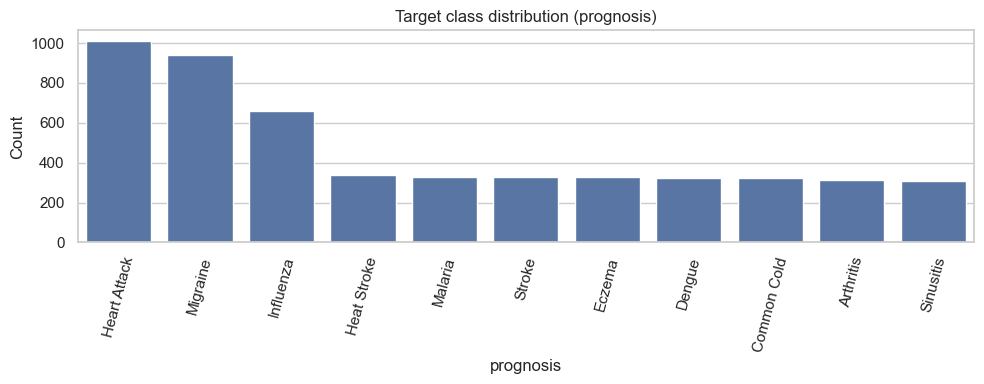

In [51]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set(style='whitegrid', font_scale=1)
top = df['prognosis'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=top.index, y=top.values)
plt.xticks(rotation=75)
plt.title('Target class distribution (prognosis)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../outputs/figures/target_distribution.png', dpi=150)
plt.show()


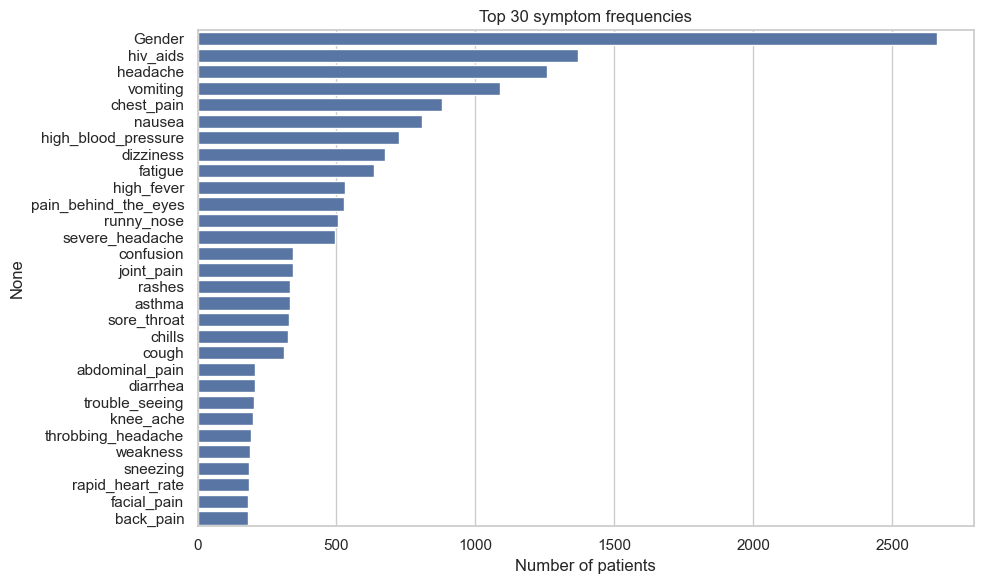

In [33]:
symptom_cols = binary_01  # or intersection of known list
symptom_counts = df[symptom_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=symptom_counts.index[:30], x=symptom_counts.values[:30])
plt.title('Top 30 symptom frequencies')
plt.xlabel('Number of patients')
plt.tight_layout()
plt.savefig('../outputs/figures/symptom_freq_top30.png', dpi=150)
plt.show()

# save table
symptom_counts.to_csv('../outputs/tables/symptom_counts.csv')


<Figure size 1000x1000 with 0 Axes>

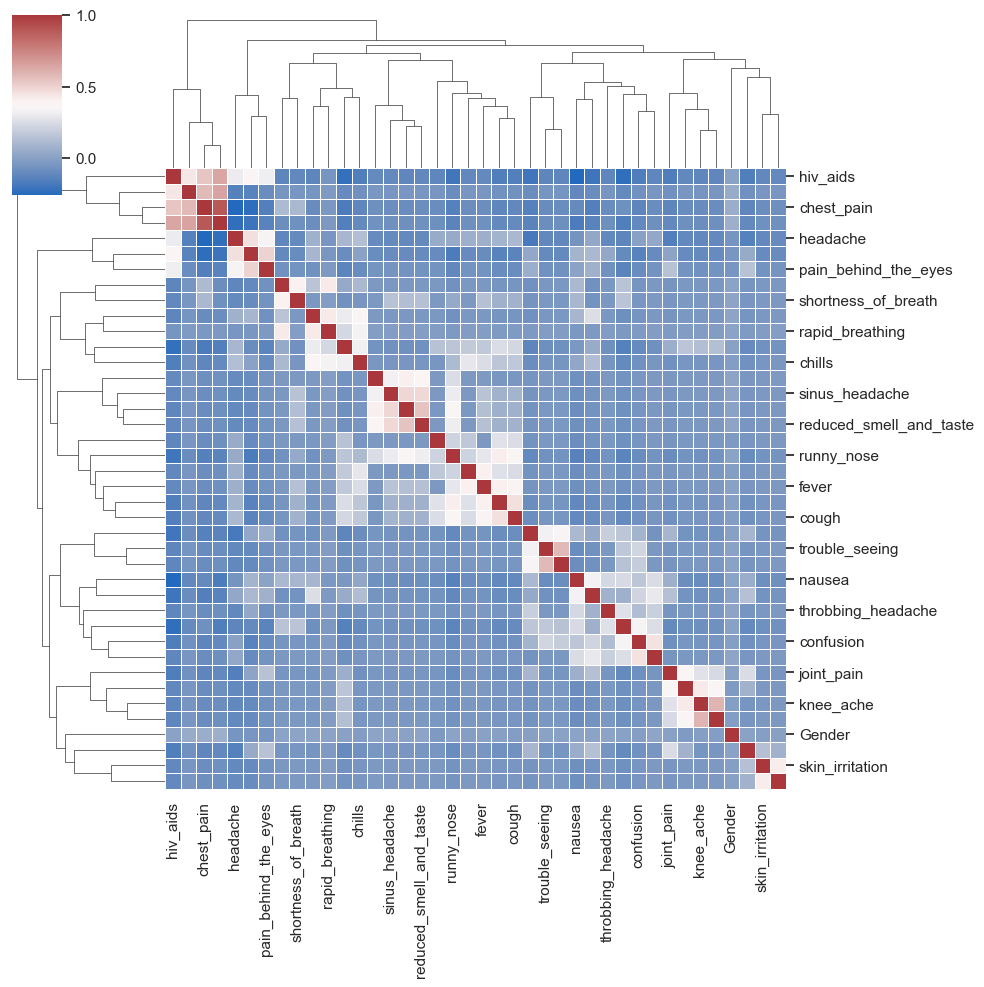

In [34]:
# correlation matrix of binary symptoms (Pearson works for binary)
corr = df[symptom_cols].corr()
# For readability, take top 40 most frequent symptoms
top_sym = symptom_counts.index[:40]
plt.figure(figsize=(10,10))
sns.clustermap(df[top_sym].corr(), cmap='vlag', linewidths=.5, figsize=(10,10))
plt.savefig('../outputs/figures/symptom_clustermap.png', dpi=150)
plt.show()


weather cols: ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']


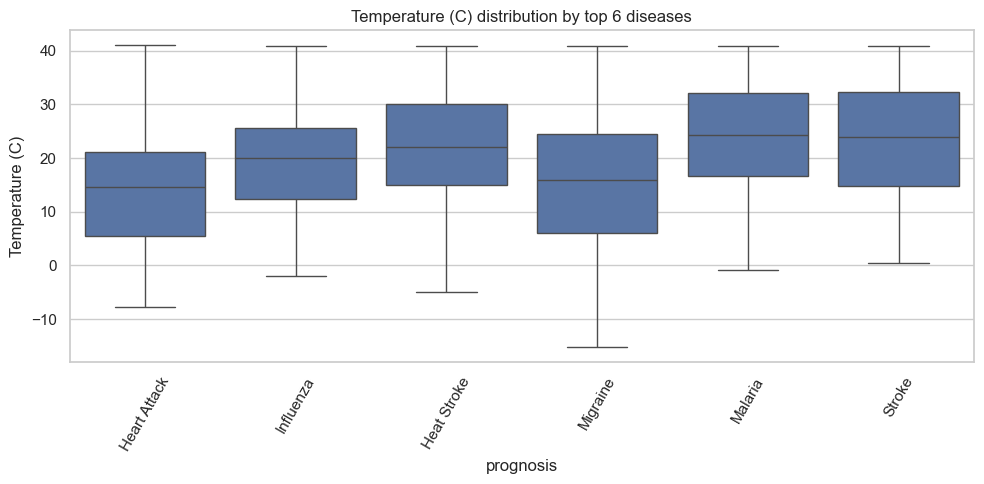

In [35]:
# detect weather columns more robustly
possible_weather = ['Temperature (C)', 'Temperature_C', 'Temp', 'Humidity', 'Wind Speed (km/h)', 'WindSpeed']
weather_cols = [c for c in possible_weather if c in df.columns]
weather_cols = [c for c in df.columns if any(k in c.lower() for k in ['temp','humid','wind'])]  # fallback
weather_cols = list(dict.fromkeys(weather_cols))  # dedupe
print("weather cols:", weather_cols)

# Boxplot of temperature by top 6 diseases
top6 = df['prognosis'].value_counts().head(6).index.tolist()
plt.figure(figsize=(10,5))
sns.boxplot(x='prognosis', y=weather_cols[0], data=df[df['prognosis'].isin(top6)])
plt.xticks(rotation=60)
plt.title(f'{weather_cols[0]} distribution by top 6 diseases')
plt.tight_layout()
plt.savefig('../outputs/figures/temp_by_disease_top6.png', dpi=150)
plt.show()



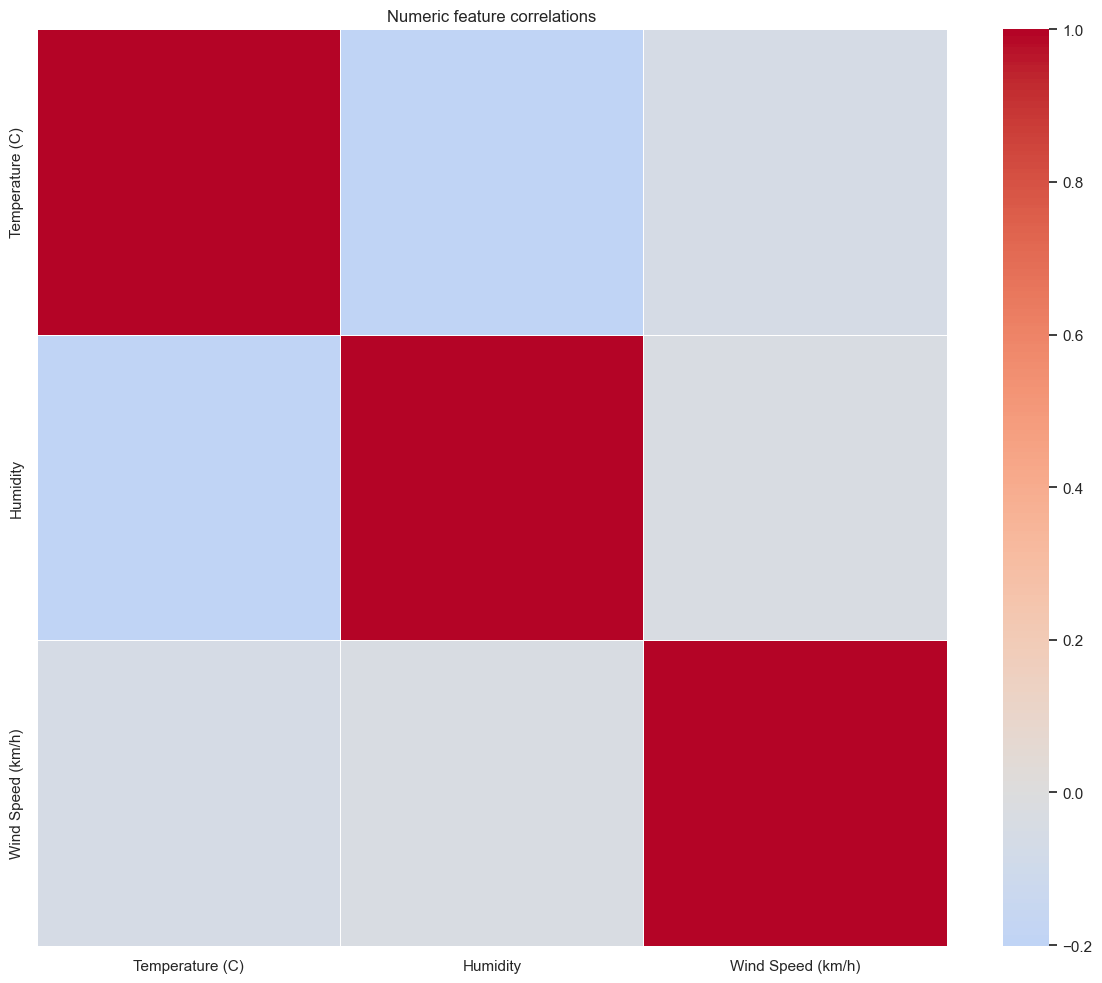

In [36]:
# numeric columns
num_cols = df.select_dtypes(include=['int16','int32','int64','float32','float64']).columns.tolist()
num_cols = [c for c in num_cols if c not in ['prognosis']]  # remove target from numeric list
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', center=0, linewidths=.5)
plt.title('Numeric feature correlations')
plt.tight_layout()
plt.savefig('../outputs/figures/numeric_corr_heatmap.png', dpi=150)
plt.show()


In [37]:
from scipy.stats import chi2_contingency
# contingency between symptom 'fever' and prognosis top 5
symptom = symptom_cols[0]   # change to a specific column like 'high_fever'
top5 = df['prognosis'].value_counts().head(5).index
ct = pd.crosstab(df[df['prognosis'].isin(top5)]['prognosis'], df[symptom])
chi2, p, dof, expected = chi2_contingency(ct)
print('Chi2 p-value:', p)



Chi2 p-value: 8.165872257578617e-07


In [38]:
from scipy.stats import f_oneway, kruskal
groups = [group[weather_cols[0]].dropna().values for _, group in df.groupby('prognosis')]
# ANOVA (if normal-ish)
fstat, p = f_oneway(*groups[:10])  # using first 10 classes or top classes only
print('ANOVA p-value:', p)
# if non-normal use Kruskal-Wallis
h, p_h = kruskal(*groups[:10])
print('Kruskal p-value:', p_h)


ANOVA p-value: 1.624398323482749e-151
Kruskal p-value: 5.2070858212375487e-132


In [39]:
# Example: save target counts
df['prognosis'].value_counts().to_csv('../outputs/tables/prognosis_counts.csv')

# If you used plt.savefig earlier, images are in outputs/figures/
import os
print("Saved figures:", os.listdir('../outputs/figures')[:50])


Saved figures: ['feature_importances.png', 'model_comparison.png', 'numeric_corr_heatmap.png', 'symptom_clustermap.png', 'symptom_freq_top30.png', 'target_distribution.png', 'temp_by_disease_top6.png']


In [40]:
import pandas as pd

# Load the dataset again (adjust filename if needed)
df = pd.read_csv('../data/Weather-related disease prediction.csv')

# (Optional sanity check)
print(df.shape)
df.head()


(5200, 51)


,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,fatigue,runny_nose,pain_behind_the_eyes,dizziness,headache,chest_pain,vomiting,cough,shivering,asthma_history,high_cholesterol,diabetes,obesity,hiv_aids,nasal_polyps,asthma,high_blood_pressure,severe_headache,weakness,trouble_seeing,fever,body_aches,sore_throat,sneezing,diarrhea,rapid_breathing,rapid_heart_rate,pain_behind_eyes,swollen_glands,rashes,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,Sinusitis


In [41]:
from scipy.stats import chi2_contingency

symptom_col = 'high_fever'
top5 = df['prognosis'].value_counts().head(5).index
subset = df[df['prognosis'].isin(top5)]

contingency = pd.crosstab(subset['prognosis'], subset[symptom_col])
chi2, p_value, dof, expected = chi2_contingency(contingency)

print(f"Chi-square test for {symptom_col} vs prognosis (top5)")
print("p-value:", p_value)


Chi-square test for high_fever vs prognosis (top5)
p-value: 0.0


In [42]:
from scipy.stats import f_oneway, kruskal

# Pick a weather column (adjust name to match your dataset)
weather_col = 'Temperature (C)'

# Select top 6 diseases for analysis
top6 = df['prognosis'].value_counts().head(6).index
groups = [group[weather_col].dropna().values for _, group in df[df['prognosis'].isin(top6)].groupby('prognosis')]

# ANOVA
f_stat, p_anova = f_oneway(*groups)
print(f"ANOVA for {weather_col} vs prognosis (top6): p = {p_anova}")

# Kruskal-Wallis (non-parametric)
h_stat, p_kruskal = kruskal(*groups)
print(f"Kruskal-Wallis for {weather_col} vs prognosis (top6): p = {p_kruskal}")


ANOVA for Temperature (C) vs prognosis (top6): p = 2.476093049657658e-82
Kruskal-Wallis for Temperature (C) vs prognosis (top6): p = 5.566210425276456e-75


In [43]:
import numpy as np

# Calculate total number of symptoms reported per row
# (assuming binary symptom columns are 0/1)
binary_cols = [c for c in df.columns if df[c].nunique() <= 3 and c not in ['prognosis','Gender']]
df['symptom_sum'] = df[binary_cols].sum(axis=1)

weather_cols = [c for c in df.columns if any(w in c.lower() for w in ['temp','humid','wind'])]
print("Weather columns:", weather_cols)

for col in weather_cols:
    corr = df[col].corr(df['symptom_sum'])
    print(f"Correlation between {col} and symptom count: {corr:.3f}")


Weather columns: ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
Correlation between Temperature (C) and symptom count: -0.037
Correlation between Humidity and symptom count: 0.042
Correlation between Wind Speed (km/h) and symptom count: 0.006


In [44]:
# Step 5: Preprocessing & Feature Engineering
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# reload clean data (if needed)
df = pd.read_csv('../data/Weather-related disease prediction.csv')

# ---- Identify feature groups ----
target = "prognosis"

# numeric features (weather, age, etc.)
numeric_features = [c for c in df.select_dtypes(include=['int16','int32','int64','float32','float64']).columns 
                    if c != target]

# categorical features (currently just Gender, but flexible)
categorical_features = [c for c in df.select_dtypes(include=['object']).columns if c != target]

# symptom features (already identified earlier as binary_01)
# if you ran the earlier step: symptom_cols = binary_01
# but here we recompute just in case
symptom_cols = [c for c in df.columns 
                if c not in [target] + numeric_features + categorical_features 
                and df[c].dropna().nunique() <= 3]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)
print("Symptom features:", len(symptom_cols))

# ---- Define preprocessing steps ----
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# For symptoms, they should already be 0/1, but we keep passthrough
symptom_transformer = "passthrough"

# ---- Combine into ColumnTransformer ----
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("sym", symptom_transformer, symptom_cols)
    ]
)

# ---- Example pipeline usage ----
# (Here we only run preprocessing without ML model)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=500))
])

# Fit/test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline.fit(X_train, y_train)

print("Preprocessing + model pipeline ready!")
print("Train score:", pipeline.score(X_train, y_train))
print("Test score:", pipeline.score(X_test, y_test))


Numeric features: ['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills', 'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness', 'headache', 'chest_pain', 'vomiting', 'cough', 'shivering', 'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids', 'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache', 'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat', 'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate', 'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache', 'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste', 'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion', 'back_pain', 'knee_ache']
Categorical features: []
Symptom features: 0
Preprocessing + model pipeline ready!
Train score: 0.9834134615384615
Test score: 0.9798076923076923
Preprocessing + model pipeline ready!
Train score: 0.9834134615384615
Test score: 

In [45]:
# Step 5 fix: Manual grouping of feature types
target = "prognosis"

# Force map features
weather_cols = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
demographic_cols = ['Age', 'Gender']

# All other binary-like columns are symptoms
symptom_cols = [c for c in df.columns 
                if c not in [target] + weather_cols + demographic_cols]

numeric_features = weather_cols + ['Age']
categorical_features = ['Gender']   # treat as categorical (0/1 or Male/Female)
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)
print("Symptom features:", len(symptom_cols))


Numeric features: ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Age']
Categorical features: ['Gender']
Symptom features: 45


In [46]:
# Transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

symptom_transformer = "passthrough"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("sym", symptom_transformer, symptom_cols)
    ]
)



In [47]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# -------------------
# Custom transformer
# -------------------
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, symptom_cols, weather_col="Temperature (C)", fever_col="high_fever"):
        self.symptom_cols = symptom_cols
        self.weather_col = weather_col
        self.fever_col = fever_col

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        # Symptom count feature
        X["symptom_sum"] = X[self.symptom_cols].sum(axis=1)
        # Interaction: weather × fever
        if self.weather_col in X.columns and self.fever_col in X.columns:
            X["temp_x_fever"] = X[self.weather_col] * X[self.fever_col]
        return X


# -------------------
# Feature grouping
# -------------------
target = "prognosis"
weather_cols = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
demographic_cols = ['Age', 'Gender']
symptom_cols = [c for c in df.columns if c not in [target] + weather_cols + demographic_cols]

numeric_features = weather_cols + ["Age"]
categorical_features = ["Gender"]

# -------------------
# Preprocessing
# -------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

symptom_transformer = "passthrough"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("sym", symptom_transformer, symptom_cols)
    ]
)

# -------------------
# Final pipeline
# -------------------
pipeline = Pipeline(steps=[
    ("feature_eng", FeatureEngineer(symptom_cols=symptom_cols)),
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=500))
])

# -------------------
# Train/test split
# -------------------
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipeline.fit(X_train, y_train)

print("Train score:", pipeline.score(X_train, y_train))
print("Test score:", pipeline.score(X_test, y_test))



Train score: 0.9764423076923077
Test score: 0.9711538461538461


In [48]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# -------------------
# Custom transformer
# -------------------
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, symptom_cols, weather_col="Temperature (C)", fever_col="high_fever"):
        self.symptom_cols = symptom_cols
        self.weather_col = weather_col
        self.fever_col = fever_col

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X["symptom_sum"] = X[self.symptom_cols].sum(axis=1)
        if self.weather_col in X.columns and self.fever_col in X.columns:
            X["temp_x_fever"] = X[self.weather_col] * X[self.fever_col]
        return X


# -------------------
# Feature groups
# -------------------
target = "prognosis"
weather_cols = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
demographic_cols = ['Age', 'Gender']
symptom_cols = [c for c in df.columns if c not in [target] + weather_cols + demographic_cols]

numeric_features = weather_cols + ["Age", "symptom_sum", "temp_x_fever"]  # add engineered features
categorical_features = ["Gender"]

# -------------------
# Transformers
# -------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

symptom_transformer = "passthrough"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("sym", symptom_transformer, symptom_cols)
    ]
)

# -------------------
# Pipeline
# -------------------
pipeline = Pipeline(steps=[
    ("feature_eng", FeatureEngineer(symptom_cols=symptom_cols)),
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=500))
])

# -------------------
# Train/test
# -------------------
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipeline.fit(X_train, y_train)

print("Train score:", pipeline.score(X_train, y_train))
print("Test score:", pipeline.score(X_test, y_test))

# -------------------
# Extract feature names
# -------------------
def get_feature_names(preprocessor):
    """Return feature names after ColumnTransformer"""
    names = []
    for name, trans, cols in preprocessor.transformers_:
        if trans == "drop":
            continue
        if trans == "passthrough":
            names.extend(cols)
        elif hasattr(trans, "get_feature_names_out"):
            names.extend(trans.get_feature_names_out(cols))
        else:
            names.extend(cols)
    return names

feature_names = get_feature_names(pipeline.named_steps["preprocess"])
print("Final feature set size:", len(feature_names))
print("Sample features:", feature_names[:20])


Train score: 0.9766826923076923
Test score: 0.975
Final feature set size: 53
Sample features: ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Age', 'symptom_sum', 'temp_x_fever', 'Gender_0', 'Gender_1', 'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills', 'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness', 'headache', 'chest_pain', 'vomiting']


In [49]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os

# -------------------
# Custom transformer
# -------------------
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, symptom_cols, weather_col="Temperature (C)", fever_col="high_fever"):
        self.symptom_cols = symptom_cols
        self.weather_col = weather_col
        self.fever_col = fever_col

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        # engineered features
        X["symptom_sum"] = X[self.symptom_cols].sum(axis=1)
        if self.weather_col in X.columns and self.fever_col in X.columns:
            X["temp_x_fever"] = X[self.weather_col] * X[self.fever_col]
        return X


# -------------------
# Feature groups
# -------------------
target = "prognosis"
weather_cols = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
demographic_cols = ['Age', 'Gender']
symptom_cols = [c for c in df.columns if c not in [target] + weather_cols + demographic_cols]

numeric_features = weather_cols + ["Age", "symptom_sum", "temp_x_fever"]
categorical_features = ["Gender"]

# -------------------
# Transformers
# -------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

symptom_transformer = "passthrough"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("sym", symptom_transformer, symptom_cols)
    ]
)

# -------------------
# Pipeline
# -------------------
pipeline = Pipeline(steps=[
    ("feature_eng", FeatureEngineer(symptom_cols=symptom_cols)),
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=500))
])

# -------------------
# Train/test
# -------------------
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipeline.fit(X_train, y_train)

print("Train score:", pipeline.score(X_train, y_train))
print("Test score:", pipeline.score(X_test, y_test))

# -------------------
# Extract feature names
# -------------------
def get_feature_names(preprocessor):
    names = []
    for name, trans, cols in preprocessor.transformers_:
        if trans == "drop":
            continue
        if trans == "passthrough":
            names.extend(cols)
        elif hasattr(trans, "get_feature_names_out"):
            names.extend(trans.get_feature_names_out(cols))
        else:
            names.extend(cols)
    return names

feature_names = get_feature_names(pipeline.named_steps["preprocess"])
print("Final feature set size:", len(feature_names))
print("Sample features:", feature_names[:20])

# -------------------
# Save feature names
# -------------------
os.makedirs("../outputs/tables", exist_ok=True)
pd.DataFrame({"feature_name": feature_names}).to_csv(
    "../outputs/tables/final_features.csv", index=False
)
print("Saved feature list to ../outputs/tables/final_features.csv")


Train score: 0.9766826923076923
Test score: 0.975
Final feature set size: 53
Sample features: ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Age', 'symptom_sum', 'temp_x_fever', 'Gender_0', 'Gender_1', 'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills', 'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness', 'headache', 'chest_pain', 'vomiting']
Saved feature list to ../outputs/tables/final_features.csv


c:\PROGRAMMING\ds-weather-disease\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


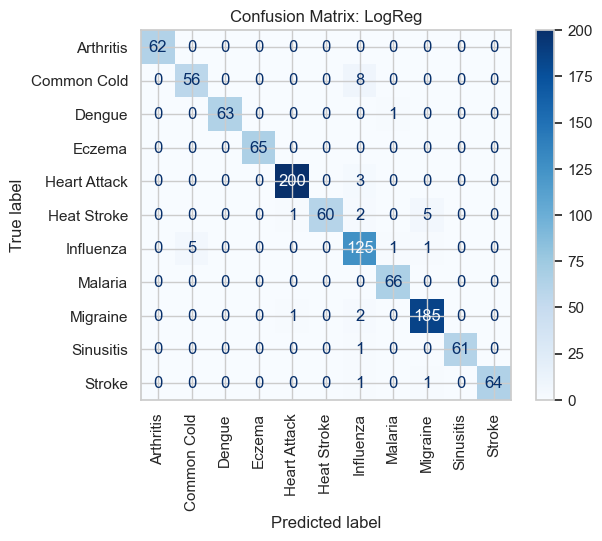

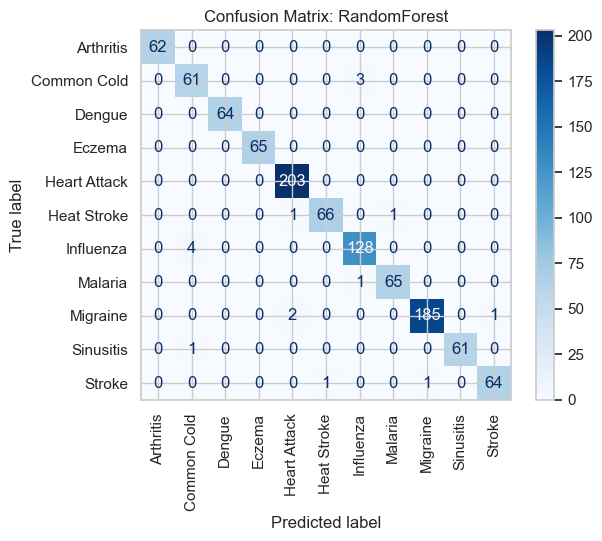

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10], got ['Arthritis' 'Common Cold' 'Dengue' 'Eczema' 'Heart Attack' 'Heat Stroke'
 'Influenza' 'Malaria' 'Migraine' 'Sinusitis' 'Stroke']

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Gradient boosting
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except ImportError:
    HAS_XGB = False

# -------------------
# Train/test split
# -------------------
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------
# Candidate models
# -------------------
models = {
    "LogReg": LogisticRegression(max_iter=500, multi_class="ovr"),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42)
}

if HAS_XGB:
    models["XGBoost"] = XGBClassifier(
        n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="mlogloss"
    )

# -------------------
# Evaluate models
# -------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    macro_f1 = report["macro avg"]["f1-score"]
    acc = report["accuracy"]

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Macro F1": macro_f1
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", xticks_rotation=90)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# -------------------
# Compare models
# -------------------
results_df = pd.DataFrame(results)
print(results_df)

# -------------------
# Optional: ROC-AUC (one-vs-rest)
# -------------------
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

y_test_bin = label_binarize(y_test, classes=np.unique(y))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test_bin, y_score, multi_class="ovr")
        print(f"{name} ROC-AUC (OvR): {auc_score:.3f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# -------------------------
# Load raw dataset
# -------------------------
df = pd.read_csv("../data/Weather-related disease prediction.csv")

# Separate features
target = "prognosis"
num_features = ['Age', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
cat_features = ['Gender']

# Symptom features (binary columns: 0/1)
symptom_features = [c for c in df.columns if c not in num_features + cat_features + [target]]

# -------------------------
# Preprocessing pipelines
# -------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

symptom_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))  # symptoms already 0/1
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
        ("symptom", symptom_transformer, symptom_features)
    ]
)

# -------------------------
# Fit + transform
# -------------------------
X = df.drop(columns=[target])
y = df[target]

X_processed = preprocessor.fit_transform(X)

# Convert back to DataFrame
num_cols = num_features
cat_cols = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(cat_features)
sym_cols = symptom_features

all_cols = list(num_cols) + list(cat_cols) + list(sym_cols)
df_processed = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
                            columns=all_cols)
df_processed[target] = y.values

# -------------------------
# Save processed dataset
# -------------------------
df_processed.to_csv("../outputs/processed_dataset.csv", index=False)
print("✅ Saved processed dataset to ../outputs/processed_dataset.csv")


✅ Saved processed dataset to ../outputs/processed_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize

# -------------------
# Ensure output dirs
# -------------------
os.makedirs("../outputs/figures", exist_ok=True)
os.makedirs("../outputs/tables", exist_ok=True)
os.makedirs("../outputs/plots", exist_ok=True)

# -------------------
# Optional gradient boosting imports
# -------------------
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except ImportError:
    HAS_XGB = False

try:
    from lightgbm import LGBMClassifier
    HAS_LGBM = True
except ImportError:
    HAS_LGBM = False

# -------------------
# Load preprocessed dataset
# -------------------
df = pd.read_csv("../outputs/processed_dataset.csv")  # <-- from Step 5
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

# Encode target labels numerically (needed for XGB/LGBM)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# -------------------
# Candidate models
# -------------------
models = {
    "LogReg": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42)
}

if HAS_XGB:
    models["XGBoost"] = XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        random_state=42, use_label_encoder=False, eval_metric="mlogloss"
    )

if HAS_LGBM:
    models["LightGBM"] = LGBMClassifier(
        n_estimators=300, learning_rate=0.1, random_state=42
    )

# -------------------
# Train + Evaluate
# -------------------
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Map predictions back to original labels for readability
    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)

    # Classification report
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    macro_f1 = report["macro avg"]["f1-score"]
    acc = report["accuracy"]

    results.append({"Model": name, "Accuracy": acc, "Macro F1": macro_f1})

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues", xticks_rotation=90)
    plt.title(f"Confusion Matrix: {name}")
    plt.savefig(f"../outputs/plots/confusion_{name}.png", bbox_inches="tight")
    plt.close()

# Save results table
results_df = pd.DataFrame(results)
results_df.to_csv("../outputs/model_baselines.csv", index=False)
print("\nSaved results to ../outputs/model_baselines.csv")
print(results_df)

# -------------------
# ROC-AUC (multi-class OvR)
# -------------------
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test_bin, y_score, multi_class="ovr")
        print(f"{name} ROC-AUC (OvR): {auc_score:.3f}")



Training LogReg...

Training RandomForest...

Training XGBoost...


c:\PROGRAMMING\ds-weather-disease\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 4160, number of used features: 46
[LightGBM] [Info] Start training from score -2.815817
[LightGBM] [Info] Start training from score -2.784194
[LightGBM] [Info] Start training from score -2.780311
[LightGBM] [Info] Start training from score -2.764926
[LightGBM] [Info] Start training from score -1.636236
[LightGBM] [Info] Start training from score -2.734848
[LightGBM] [Info] Start training from score -2.067969
[LightGBM] [Info] Start training from score -2.757321
[LightGBM] [Info] Start training from score -1.709205
[LightGBM] [Info] Start training from score -2.819842
[LightG

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize

# -------------------
# Ensure output dirs
# -------------------
os.makedirs("../outputs/figures", exist_ok=True)
os.makedirs("../outputs/tables", exist_ok=True)
os.makedirs("../outputs/plots", exist_ok=True)

# -------------------
# Optional gradient boosting imports
# -------------------
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except ImportError:
    HAS_XGB = False

try:
    from lightgbm import LGBMClassifier
    HAS_LGBM = True
except ImportError:
    HAS_LGBM = False

# -------------------
# Load preprocessed dataset
# -------------------
df = pd.read_csv("../outputs/processed_dataset.csv")
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

# Encode target labels numerically (needed for XGB/LGBM)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# -------------------
# Candidate models
# -------------------
models = {
    "LogReg": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42)
}

if HAS_XGB:
    models["XGBoost"] = XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        random_state=42, use_label_encoder=False, eval_metric="mlogloss"
    )

if HAS_LGBM:
    models["LightGBM"] = LGBMClassifier(
        n_estimators=300, learning_rate=0.1, random_state=42
    )

# -------------------
# Train + Evaluate
# -------------------
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Map predictions back to original labels for readability
    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)

    # Classification report
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    macro_f1 = report["macro avg"]["f1-score"]
    acc = report["accuracy"]

    results.append({"Model": name, "Accuracy": acc, "Macro F1": macro_f1})

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues", xticks_rotation=90)
    plt.title(f"Confusion Matrix: {name}")
    plt.savefig(f"../outputs/plots/confusion_{name}.png", bbox_inches="tight")
    plt.close()

# Save results table
results_df = pd.DataFrame(results)
results_df.to_csv("../outputs/model_baselines.csv", index=False)
print("\nSaved results to ../outputs/model_baselines.csv")
print(results_df)

# -------------------
# ROC-AUC (multi-class OvR)
# -------------------
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test_bin, y_score, multi_class="ovr")
        print(f"{name} ROC-AUC (OvR): {auc_score:.3f}")

# -------------------
# Summary Bar Plot
# -------------------
plt.figure(figsize=(8, 6))
x = np.arange(len(results_df))
bar_width = 0.35

plt.bar(x - bar_width/2, results_df["Accuracy"], width=bar_width, label="Accuracy")
plt.bar(x + bar_width/2, results_df["Macro F1"], width=bar_width, label="Macro F1")

plt.xticks(x, results_df["Model"])
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs Macro F1")
plt.legend()
plt.ylim(0, 1.05)

plt.savefig("../outputs/figures/model_comparison.png", bbox_inches="tight")
plt.close()
print("Saved summary plot to ../outputs/figures/model_comparison.png")



Training LogReg...

Training RandomForest...

Training XGBoost...


c:\PROGRAMMING\ds-weather-disease\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:26:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 4160, number of used features: 46
[LightGBM] [Info] Start training from score -2.815817
[LightGBM] [Info] Start training from score -2.784194
[LightGBM] [Info] Start training from score -2.780311
[LightGBM] [Info] Start training from score -2.764926
[LightGBM] [Info] Start training from score -1.636236
[LightGBM] [Info] Start training from score -2.734848
[LightGBM] [Info] Start training from score -2.067969
[LightGBM] [Info] Start training from score -2.757321
[LightGBM] [Info] Start training from score -1.709205
[LightGBM] [Info] Start training from score -2.819842
[LightGBM] [Info] Start training from score -2.761116
[LightGBM] [Warni

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize

# -------------------
# Ensure output dirs
# -------------------
os.makedirs("../outputs/figures", exist_ok=True)
os.makedirs("../outputs/tables", exist_ok=True)
os.makedirs("../outputs/plots", exist_ok=True)

# -------------------
# Optional gradient boosting imports
# -------------------
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except ImportError:
    HAS_XGB = False

try:
    from lightgbm import LGBMClassifier
    HAS_LGBM = True
except ImportError:
    HAS_LGBM = False

# -------------------
# Load preprocessed dataset
# -------------------
df = pd.read_csv("../outputs/processed_dataset.csv")
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

# Encode target labels numerically (needed for XGB/LGBM)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# -------------------
# Candidate models
# -------------------
models = {
    "LogReg": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42)
}

if HAS_XGB:
    models["XGBoost"] = XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        random_state=42, use_label_encoder=False, eval_metric="mlogloss"
    )

if HAS_LGBM:
    models["LightGBM"] = LGBMClassifier(
        n_estimators=300, learning_rate=0.1, random_state=42
    )

# -------------------
# Train + Evaluate
# -------------------
results = []
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Map predictions back to original labels for readability
    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)

    # Classification report
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    macro_f1 = report["macro avg"]["f1-score"]
    acc = report["accuracy"]

    results.append({"Model": name, "Accuracy": acc, "Macro F1": macro_f1})

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues", xticks_rotation=90)
    plt.title(f"Confusion Matrix: {name}")
    plt.savefig(f"../outputs/plots/confusion_{name}.png", bbox_inches="tight")
    plt.close()

    # ROC Curve (if model supports predict_proba)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(le.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves (macro-averaged)
        plt.figure(figsize=(7, 6))
        for i in range(len(le.classes_)):
            plt.plot(fpr[i], tpr[i], lw=1,
                     label=f"{le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

        plt.plot([0, 1], [0, 1], "k--", lw=1)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curves (One-vs-Rest): {name}")
        plt.legend(loc="best", fontsize="small")
        plt.savefig(f"../outputs/plots/roc_{name}.png", bbox_inches="tight")
        plt.close()

        auc_score = roc_auc_score(y_test_bin, y_score, multi_class="ovr")
        print(f"{name} ROC-AUC (OvR): {auc_score:.3f}")

# -------------------
# Save results table
# -------------------
results_df = pd.DataFrame(results)
results_df.to_csv("../outputs/model_baselines.csv", index=False)
print("\nSaved results to ../outputs/model_baselines.csv")
print(results_df)

# -------------------
# Summary Bar Plot
# -------------------
plt.figure(figsize=(8, 6))
x = np.arange(len(results_df))
bar_width = 0.35

plt.bar(x - bar_width/2, results_df["Accuracy"], width=bar_width, label="Accuracy")
plt.bar(x + bar_width/2, results_df["Macro F1"], width=bar_width, label="Macro F1")

plt.xticks(x, results_df["Model"])
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs Macro F1")
plt.legend()
plt.ylim(0, 1.05)

plt.savefig("../outputs/figures/model_comparison.png", bbox_inches="tight")
plt.close()
print("Saved summary plot to ../outputs/figures/model_comparison.png")



Training LogReg...
LogReg ROC-AUC (OvR): 1.000

Training RandomForest...
RandomForest ROC-AUC (OvR): 1.000

Training XGBoost...


c:\PROGRAMMING\ds-weather-disease\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:28:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost ROC-AUC (OvR): 1.000

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 4160, number of used features: 46
[LightGBM] [Info] Start training from score -2.815817
[LightGBM] [Info] Start training from score -2.784194
[LightGBM] [Info] Start training from score -2.780311
[LightGBM] [Info] Start training from score -2.764926
[LightGBM] [Info] Start training from score -1.636236
[LightGBM] [Info] Start training from score -2.734848
[LightGBM] [Info] Start training from score -2.067969
[LightGBM] [Info] Start training from score -2.757321
[LightGBM] [Info] Start training from score -1.709205
[LightGBM] [Info] Start training from score -2.819842
[LightGBM] [Info] Start training from scor

In [ ]:
# compare_models.py

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Optional XGBoost (if installed)
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except ImportError:
    HAS_XGB = False

# -----------------------------
# 1️⃣ Ensure directories exist
# -----------------------------
os.makedirs("../outputs/plots", exist_ok=True)
os.makedirs("../models", exist_ok=True)

# -----------------------------
# 2️⃣ Load dataset
# -----------------------------
DATA_PATH = "../outputs/processed_dataset.csv"
assert os.path.exists(DATA_PATH), f"❌ Dataset not found at {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
print(f"✅ Loaded dataset with shape {df.shape}")

X = df.drop(columns=["prognosis"])
y = df["prognosis"]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"✅ Encoded {len(label_encoder.classes_)} unique diseases.")

# -----------------------------
# 3️⃣ Split train/test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# -----------------------------
# 4️⃣ Define models
# -----------------------------
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, multi_class="ovr", random_state=42),
}

if HAS_XGB:
    models["XGBoost"] = XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        use_label_encoder=False,
        eval_metric="mlogloss",
        random_state=42
    )

# -----------------------------
# 5️⃣ Train & evaluate
# -----------------------------
results = []

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    results.append({"Model": name, "Accuracy": acc, "Macro F1": f1})

    print(f"✅ {name} → Accuracy: {acc:.4f} | Macro F1: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap="Blues", xticks_rotation=90)
    plt.title(f"Confusion Matrix: {name}")
    plt.tight_layout()
    plt.savefig(f"../outputs/plots/confusion_matrix_{name.replace(' ', '_')}.png")
    plt.close()

# -----------------------------
# 6️⃣ Compare results
# -----------------------------
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df.to_csv("../outputs/model_comparison.csv", index=False)

print("\n📊 Model Comparison Results:")
print(results_df)

# -----------------------------
# 7️⃣ Save best model
# -----------------------------
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\n🏆 Best Model Selected: {best_model_name}")

# Save best model, encoder, and feature names
joblib.dump(best_model, "../models/weather_disease_model.joblib")
joblib.dump(label_encoder, "../models/label_encoder.joblib")
joblib.dump(list(X.columns), "../models/feature_names.joblib")

print("✅ Model, encoder, and features saved in /models/")


✅ Loaded dataset with shape (5200, 52)
✅ Encoded 11 unique diseases.

🚀 Training Random Forest...
✅ Random Forest → Accuracy: 0.9875 | Macro F1: 0.9868

🚀 Training Logistic Regression...


c:\PROGRAMMING\ds-weather-disease\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Logistic Regression → Accuracy: 0.9663 | Macro F1: 0.9672

🚀 Training XGBoost...


c:\PROGRAMMING\ds-weather-disease\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost → Accuracy: 0.9856 | Macro F1: 0.9845

📊 Model Comparison Results:
                 Model  Accuracy  Macro F1
0        Random Forest  0.987500  0.986843
2              XGBoost  0.985577  0.984484
1  Logistic Regression  0.966346  0.967198

🏆 Best Model Selected: Random Forest
✅ Model, encoder, and features saved in /models/
